In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
data=pd.read_csv("medias_per_countries.csv")
data.dtypes

id                  int64
media_coverage     object
url                object
media_name         object
media_type         object
media_subject      object
media_language     object
media_diffusion    object
media_location     object
coverage           object
true_country       object
dtype: object

## Nombres d'entrées non nulles

In [4]:
(~data.isna()).sum()

id                 21898
media_coverage     21829
url                21898
media_name         21898
media_type         21699
media_subject      21699
media_language     21699
media_diffusion     3322
media_location     17428
coverage           17428
true_country       21898
dtype: int64

## Liste de Médias Francais s'exprimant en anglais

In [4]:
data[(data.loc[:, "true_country"]=="France") & (data.loc[:, "media_language"]=="ENG") ]

,Unnamed: 0,media_coverage,url,media_name,media_type,media_subject,media_language,media_diffusion,media_location,coverage,true_country
10248,2,National,http://www.france24.com/en/,France 24,BC,GI,ENG,TV,France - Broadcast News Media,France Newspapers and News Media - National an...,France
10258,12,National,http://www.french-news-online.com/,France News Online,IN,GI,ENG,NaN,France - Internet News Souces,France Newspapers and News Media - National an...,France
10268,22,National,http://www.thelocal.fr/,The Local,IN,GI,ENG,NaN,France - Internet News Souces,France Newspapers and News Media - National an...,France
10271,25,Foreign,http://www.expatica.com/fr/main.html,Expatica,IN,GI,ENG,NaN,France - Internet News Souces,France Newspapers and News Media - National an...,France
10294,48,National,http://www.afp.com/en,Agence France Presse,PA,GI,ENG,NaN,France - Press Agency News Media,France Newspapers and News Media - National an...,France
10343,97,Pais,http://www.connexionfrance.com/,Connexion,NP,ET,ENG,English,Ile de France,France Newspapers and News Media - Local,France
10397,151,Nice,http://www.letsgoriviera.com/,Let's Go Riviera,NP,ET,ENG,English,Provence Alpes Cote D'Azur,France Newspapers and News Media - Local,France


## Pie Chart des locations de médias parlant en anglais 

In [7]:
list(data.loc[:, ["media_language", "true_country"]].value_counts()["ENG"].iloc[:30].index)

['United Kingdom',
 'United States',
 'Nigeria',
 'South Africa',
 'India',
 'New Zealand',
 'Philippines',
 'Zimbabwe',
 'Ireland',
 'Australia',
 'Africa Regional',
 'Bangladesh',
 'Canada',
 'Ghana',
 'Pakistan',
 'Zambia',
 'International',
 'Asia Regional',
 'Somalia',
 'Sri Lanka',
 'Cuba',
 'Sierra Leone',
 'Afghanistan',
 'Kenya',
 'Near and Middle East Regional',
 'Ethiopia',
 'Spain',
 'Israel',
 'Liberia',
 'China']

In [8]:
liste_countries=['United Kingdom','United States','Nigeria','South Africa','India','New Zealand','Philippines',
                'Ireland','Australia','Africa Regional','Bangladesh','Canada','Ghana','Pakistan',
                'Zambia','International','Asia Regional','Somalia','Sri Lanka',
                'Cuba','Sierra Leone','Kenya','Near and Middle East Regional',
                'Ethiopia','Spain','Israel','Liberia','China']

df_urls=data.loc[data.loc[:, "true_country"].isin(liste_countries), :]

In [9]:
df_urls

,id,media_coverage,url,media_name,media_type,media_subject,media_language,media_diffusion,media_location,coverage,true_country
0,0,National,https://www.abc.net.au/,ABC,BC,GI,ENG,Radio TV,NaN,NaN,Australia
1,1,National,https://www.abc.net.au/radio-australia/,ABC Radio Australia,BC,GI,ENG,Radio,NaN,NaN,Australia
2,2,National,https://www.foxsports.com.au/,Fox Sports,BC,SP,ENG,TV,NaN,NaN,Australia
3,3,National,https://www.9news.com.au/,Nine,BC,GI,ENG,TV,NaN,NaN,Australia
4,4,National,https://www.sbs.com.au/,SBS,BC,GI,ENG,Radio\nTV,NaN,NaN,Australia
...,...,...,...,...,...,...,...,...,...,...,...
21789,21789,Lusaka,http://www.qfmzambia.com/,Q FM,BC,GI,ENG,Radio,Lusaka,Zambia Newspapers and News Media - Local,Zambia
21790,21790,Lusaka,http://rainbownewszambia.com/,Rainbow Newspaper,NP,GI,ENG,NaN,Lusaka,Zambia Newspapers and News Media - Local,Zambia
21791,21791,Lusaka,http://www.times.co.zm/,Times of Zambia,NP,GI,ENG,NaN,Lusaka,Zambia Newspapers and News Media - Local,Zambia
21792,21792,Lusaka,https://www.daily-mail.co.zm,Zambia Daily Mail,NP,GI,ENG,NaN,Lusaka,Zambia Newspapers and News Media - Local,Zambia


## Bar Graph des différents languages (Anglais, Espagnol, Francais, portugais, russe, arabe, allemand, chinois)

<AxesSubplot:xlabel='media_language'>

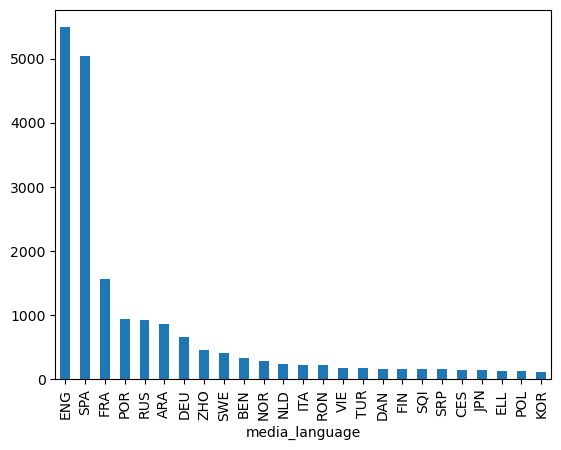

In [6]:
data.loc[:, "media_language"].value_counts().iloc[:25].plot.bar()

## Liste non exhaustives d'anaoncronymes


Media Type
<br> 
<br> 
BC-Broadcast
<br> 
IN-Internet
<br> 
MG-Magazine
<br> 
NP-Newspaper
<br> 
PA-Press Agency 	

Media Focus
<br> 
<br> 
AG-Agriculture
<br> 
AL-Alternative
<br> 
BU-Business
<br> 
ET-Ethnic
<br> 
GI-General Interest
<br> 
SP-Sport 	

## Barplot du "focus" du médias princiapelement General Interest (GI), business(BU) et sport(SP)

<AxesSubplot:xlabel='media_subject'>

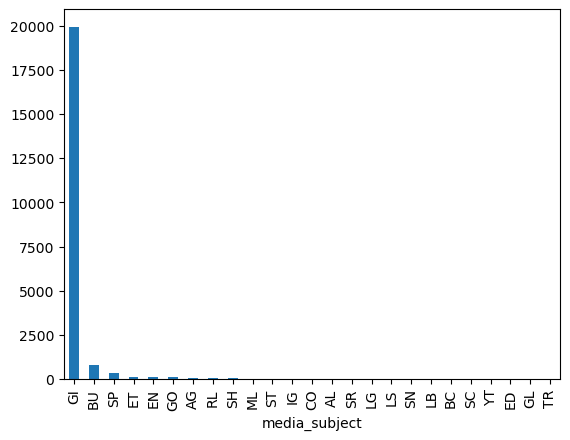

In [7]:
data.loc[:, "media_subject"].value_counts().iloc[:25].plot.bar()

## Barplot du type de médias principalement des newspaper (NP), sites internets(IN), broadcast(BC), agence de presse(PA)

<AxesSubplot:xlabel='media_type'>

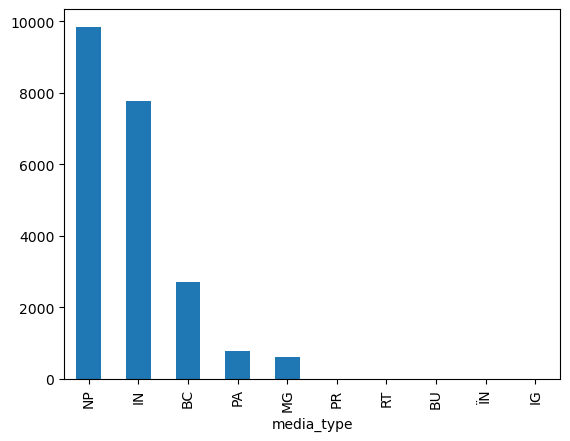

In [8]:
data.loc[:, "media_type"].value_counts().iloc[:25].plot.bar()